In [4]:
import torch
import matplotlib.pyplot as plt
import cv2
import open3d as o3d
import numpy as np
import json

import sys
sys.path.append('..')
import dur360bev_dataset

from torchvision import transforms
totorch_img = transforms.Compose((
                transforms.ToTensor(),
        ))
dataset = dur360bev_dataset.Dur360BEV("../data/Dur360BEV_Dataset",
                            img_type='equi_img',      
                            map_r=100, 
                            map_scale=2,
                            transform=totorch_img,
                            is_train=True,
                            bev_labels=['Car','Pedestrian','Lane'])


Loaded elements: 1428
Min longitude: -1.5993289
Max longitude: -1.5504879
Min latitude: 54.7595909
Max latitude: 54.7875238
Longitude range: 0.04884099999999991
Latitude range: 0.027932900000003258


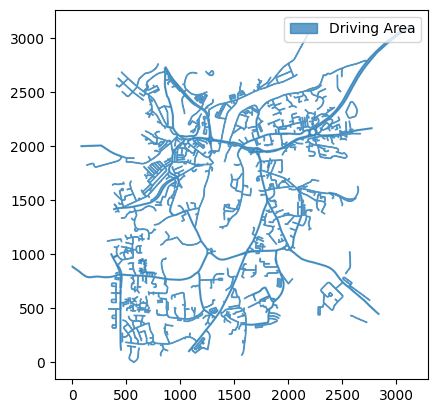

In [5]:
idx = 2000
img = dataset[idx]['image']
lidar_imgs = dataset[idx]['lidar_images']
bev_seg = dataset[idx]['bev_seg']
center = dataset[idx]['center']
offset = dataset[idx]['offset']

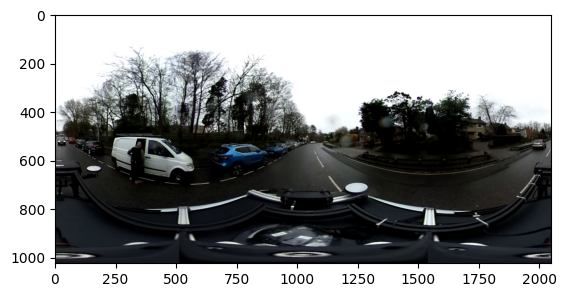

In [6]:
plt.imshow(img.permute(1,2,0))

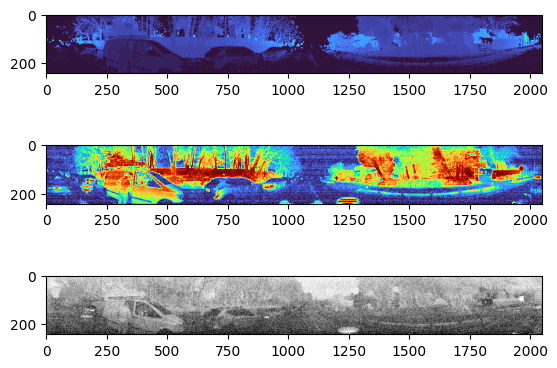

In [7]:
plt.subplot(3,1,1)
plt.imshow(lidar_imgs['range_img'][0], cmap='turbo')
plt.subplot(3,1,2)
plt.imshow(lidar_imgs['intensity_img'][0], cmap='turbo')
plt.subplot(3,1,3)
plt.imshow(lidar_imgs['ambient_img'][0], cmap='gray')

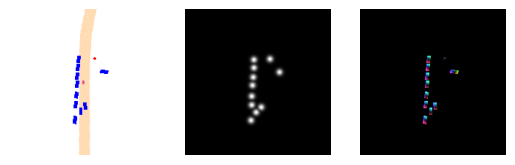

In [8]:
rendered_bev = dataset.render_colored_bev(bev_seg)
rendered_off = dataset.render_colored_offset(torch.Tensor(offset).unsqueeze(0))
plt.subplot(1,3,1)
plt.imshow(rendered_bev)
plt.axis('off')
plt.subplot(1,3,2)
plt.imshow(center[0], cmap='gray')
plt.axis('off')
plt.subplot(1,3,3)
plt.imshow(rendered_off[0].permute(1,2,0))
plt.axis('off')
plt.show()